In [2]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.read_csv('../RAIN DATASET/district wise rainfall normal.csv')

C:\Users\shaba\AppData\Local\Temp\ipykernel_10248\2721355744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df.head() 


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [4]:
samples=df.sample(frac=.25)
samples

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
290,HARYANA,MAHENDRAGARH,11.8,10.9,9.4,5.3,18.9,43.5,154.3,144.4,53.2,14.1,3.5,6.9,476.2,22.7,33.6,395.4,24.5
108,WEST BENGAL,KOLKATA,14.4,24.7,33.5,53.1,113.4,278.3,361.0,335.2,306.6,155.3,24.8,8.9,1709.2,39.1,200.0,1281.1,189.0
5,ARUNACHAL PRADESH,SUBANSIRI F.D,28.0,48.3,85.3,101.5,140.5,228.4,217.4,182.8,159.8,75.9,20.9,11.6,1300.4,76.3,327.3,788.4,108.4
626,KERALA,ALAPPUZHA,17.5,27.9,45.1,134.0,298.7,593.0,533.0,343.1,276.8,332.9,187.6,51.6,2841.2,45.4,477.8,1745.9,572.1
545,ANDHRA PRADESH,VIZIANAGARAM,8.7,14.4,17.7,32.3,90.7,140.7,181.5,194.8,209.1,188.1,56.3,6.1,1140.4,23.1,140.7,726.1,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,MIZORAM,LAWNGTLAI,8.3,27.5,66.7,122.9,319.8,437.2,493.9,408.8,365.8,231.5,66.0,9.2,2557.6,35.8,509.4,1705.7,306.7
413,MADHYA PRADESH,JHABUA,2.6,0.3,0.9,0.9,7.8,108.2,240.6,248.3,148.2,39.0,12.4,3.6,812.8,2.9,9.6,745.3,55.0
501,MAHARASHTRA,BEED,2.5,2.0,3.8,7.0,19.7,128.3,136.2,137.0,167.9,71.3,22.6,10.1,708.4,4.5,30.5,569.4,104.0
448,MADHYA PRADESH,DINDORI,19.6,19.4,13.8,5.0,9.1,196.9,413.3,403.4,192.3,37.2,10.1,16.6,1336.7,39.0,27.9,1205.9,63.9


In [5]:
pop_desc=df['ANNUAL'].describe()
sample_desc=samples['ANNUAL'].describe()

print("Population Statisctics",pop_desc,sep="\n",end="\n\n")
print("Population Statisctics",sample_desc,sep="\n",end="\n")

Population Statisctics
count     641.000000
mean     1346.969579
std       838.878874
min        94.600000
25%       830.400000
50%      1116.200000
75%      1530.900000
max      7229.300000
Name: ANNUAL, dtype: float64

Population Statisctics
count     160.000000
mean     1350.006875
std       792.456815
min       308.100000
25%       832.100000
50%      1111.950000
75%      1561.100000
max      4306.000000
Name: ANNUAL, dtype: float64


In [6]:
population_mean=1346.97
sample_annual=np.array(samples['ANNUAL'])

t_stat,p_value=stats.ttest_1samp(sample_annual,population_mean)
print('T-Statistic:', t_stat)
print('P-value',p_value)

alpha=0.05

if p_value<alpha:
    print("Reject null hypothesis, Significant difference btw sample mean and hypothesized pop mean")
else:
    print(" Failed to Reject null hypothesis, No Significant difference btw sample mean and hypothesized pop mean")

T-Statistic: 0.048474272850232716
P-value 0.9613991033245295
 Failed to Reject null hypothesis, No Significant difference btw sample mean and hypothesized pop mean


In [7]:

# Calculate the 95% confidence interval for the population mean
confidence_level = 0.95
n = len(sample_annual)
se = np.std(sample_annual, ddof=1) / np.sqrt(n)
margin_of_error = stats.t.ppf(1 - (1 - confidence_level) / 2, n-1) * se
lower_limit = np.mean(sample_annual) - margin_of_error
upper_limit = np.mean(sample_annual) + margin_of_error
print(f"95% confidence interval: ({lower_limit:.2f}, {upper_limit:.2f})")

95% confidence interval: (1226.27, 1473.74)


In [11]:
population_mean

1346.97

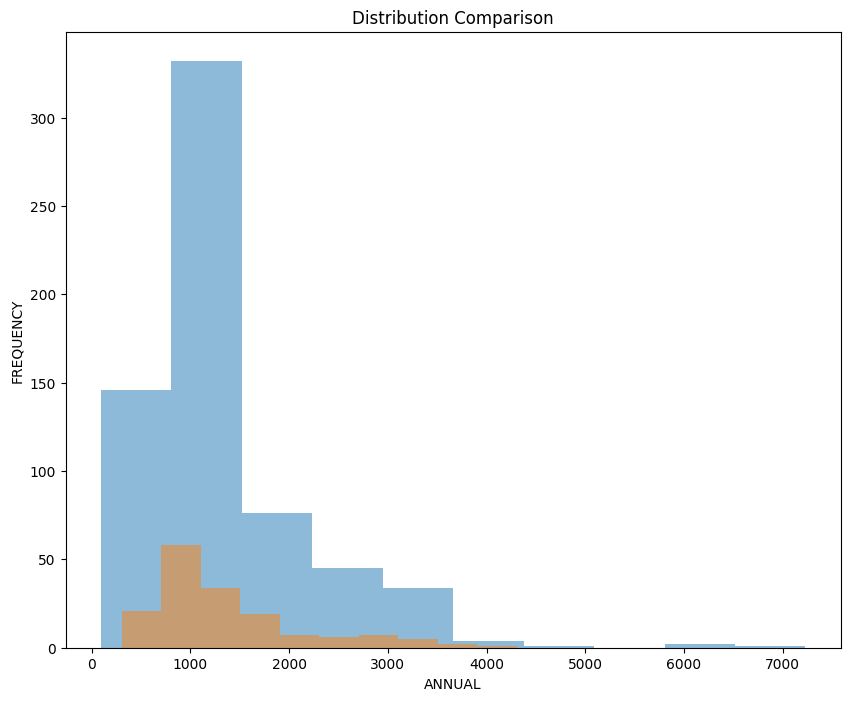

In [12]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
plt.hist(df['ANNUAL'],alpha=0.5)
plt.hist(samples['ANNUAL'],alpha=0.5)

plt.title("Distribution Comparison")
plt.xlabel('ANNUAL')
plt.ylabel('FREQUENCY')
plt.show()

In [9]:
p=np.array(df['ANNUAL'])
# Calculate the mean
mean = np.mean(p)

# Calculate the standard deviation
std_dev = np.std(p)

# Calculate the coefficient of variation
cv = std_dev / mean

print(f"Coefficient of Variation: {cv:.2f}")

Coefficient of Variation: 0.62


In [10]:
p=np.array(samples['ANNUAL'])
# Calculate the mean
mean = np.mean(p)

# Calculate the standard deviation
std_dev = np.std(p)

# Calculate the coefficient of variation
cv = std_dev / mean

print(f"Coefficient of Variation: {cv:.2f}")

Coefficient of Variation: 0.59
